## Regularization LASSO Regression

#### Lasso (Least Absolute Shrinkage and Selection Operator)

### Impose a penalty on the size of coefficients $\min_{\theta} {{|| X * \theta - y||_2} + \alpha {||\theta||_1}}$

This type of regularization (L1 Norm) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in __feature selection__. 

The L1 norm is calculated as the sum of the absolute vector values.
$||v||_{1} = \sum_{k=1}^n{|x_i| }$

The name relates to the distance a taxi has to drive in a rectangular street grid to get from the origin to the point x hence also known as __Taxicab norm or Manhattan norm__.

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed 

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

__First we need some data. Let us use the Yacht Hydrodynamics Data Set provided on eCampus.__ __"yacht_hydrodynamics.data"__

Data from: Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics# 

__Below is the file description.__
Variations concern hull geometry coefficients and the Froude number:
1. Longitudinal position of the center of buoyancy, adimensional. (CB)
2. Prismatic coefficient, adimensional. (PrismCoeff)
3. Length-displacement ratio, adimensional. (LbyD)
4. Beam-draught ratio, adimensional. (BbyT)
5. Length-beam ratio, adimensional. (LbyB)
6. Froude number, adimensional. (FrNo)
7. Residuary resistance per unit weight of displacement, adimensional (RRes)



__Let us set Path and Read All data from Excel File__

In [2]:
import os
path = os.getcwd() + '\\yacht_hydrodynamics.data'
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
data = pd.read_csv(path, sep='\s+',  header = None) 
data.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [3]:
data.columns=["CB","PrismCoeff","LbyD","BbyT","LbyB","FrNo","RRes"]
data.head()

,CB,PrismCoeff,LbyD,BbyT,LbyB,FrNo,RRes
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


<AxesSubplot:xlabel='FrNo', ylabel='RRes'>

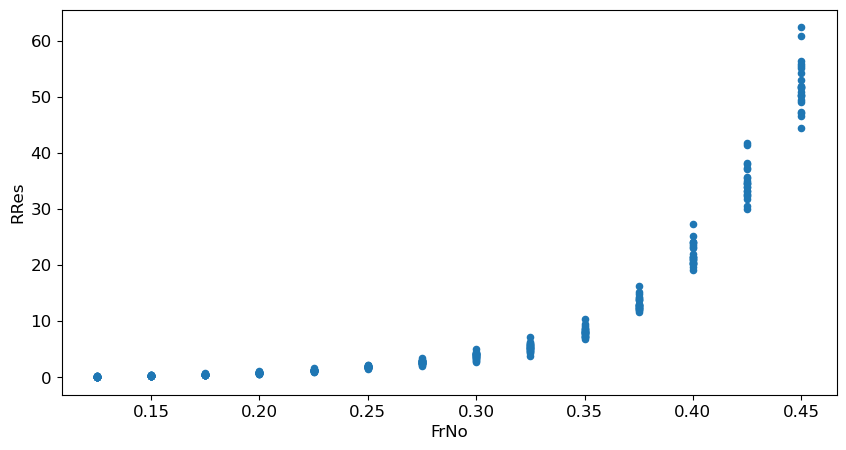

In [4]:
data.plot(kind='scatter', x='FrNo', y='RRes', figsize=(10,5))

In [5]:
# Create X & Y
# Assigning dataset to template X & y
X = data.iloc[:, :-1].values # All except last column
y = data.iloc[:, -1].values # Last Column

In [6]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

93 93


## Polynomial MODEL ##

In [7]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
# Generate a new feature matrix consisting of all polynomial combinations of the features
# with degree less than or equal to the specified degree. For example, if an input sample
# is two dimensional and of the form [a, b], the degree-2 polynomial features are
# [1, a, b, a^2, ab, b^2].

X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

poly_reg.fit(X_poly_train, y_train)
lin_reg_Poly = LinearRegression()
lin_reg_Poly.fit(X_poly_train, y_train)
X_poly_train.shape

(215, 210)

### LASSO Regression 

In [8]:
# Difference of lasso and ridge regression is that some of the coefficients can be zero 
# i.e. some of the features are  completely neglected

# The default value of regularization parameter in Lasso regression (given by α) is 1.
lasso = Lasso(max_iter=10e5) # Default iterations throws warning about convergence
lasso.fit(X_poly_train,y_train)
train_score=lasso.score(X_poly_train,y_train)
test_score=lasso.score(X_poly_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.8249728289797518
test score:  0.7841408129892291
number of features used:  10


In [9]:
lassoLOW = Lasso(alpha=0.01, max_iter=10e6)
lassoLOW.fit(X_poly_train,y_train)
train_scoreLOW=lassoLOW.score(X_poly_train,y_train)
test_scoreLOW=lassoLOW.score(X_poly_test,y_test)
coeff_usedLOW = np.sum(lassoLOW.coef_!=0)
print("training score for alpha = 0.01:", train_scoreLOW )
print("test score for alpha = 0.01: ", test_scoreLOW)
print("number of features used: for alpha = 0.01:", coeff_usedLOW)

training score for alpha = 0.01: 0.9584910290693903
test score for alpha = 0.01:  0.9256696774045694
number of features used: for alpha = 0.01: 29


In [10]:
lr = LinearRegression()
lr.fit(X_poly_train,y_train)
lr_train_score=lr.score(X_poly_train,y_train)
lr_test_score=lr.score(X_poly_test,y_test)
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)
print("number of features used: for LR:", X_poly_train.shape[1])

LR training score: 0.9982945867513513
LR test score:  0.9973923421552634
number of features used: for LR: 210


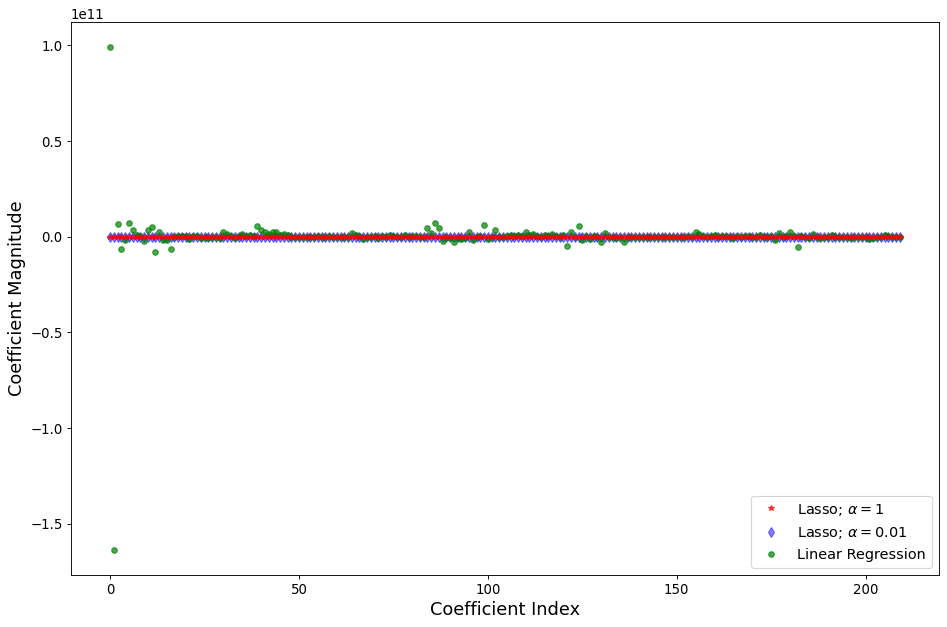

In [11]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lassoLOW.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

### $\alpha$ makes some of the coefficients zero i.e. some of the features are  completely neglected